In [235]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [236]:
# loading the dataset
data = pd.read_csv('/content/diabetes.csv')

In [237]:
# data size
data.shape

(768, 9)

In [238]:
# viewing first few entries of data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [239]:
# viewing last few entries of dataframe
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [240]:
# making a copy of dataset
data_d = data.copy()

In [241]:
# data type of each column
data_d.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [242]:
# the number of occurances of elements in dataframe
data_d.count()

,0
Pregnancies,768
Glucose,768
BloodPressure,768
SkinThickness,768
Insulin,768
BMI,768
DiabetesPedigreeFunction,768
Age,768
Outcome,768


In [243]:
# more info about data
data_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [244]:
# list of columns
data_d.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

# **Data** **Preparation**

In [245]:
# count of missing values in data
data_d.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [246]:
# count of duplicate rows in data
hu = data_d.duplicated().sum()
print('Total number of missing values in data :',hu)

Total number of missing values in data : 0


In [247]:
# print unique values number for  each numerical variable
for col in data_d:
  print(f"Unique values number in '{col}' :")
  print(data_d[col].nunique())
  print('-' * 40)

Unique values number in 'Pregnancies' :
17
----------------------------------------
Unique values number in 'Glucose' :
136
----------------------------------------
Unique values number in 'BloodPressure' :
47
----------------------------------------
Unique values number in 'SkinThickness' :
51
----------------------------------------
Unique values number in 'Insulin' :
186
----------------------------------------
Unique values number in 'BMI' :
248
----------------------------------------
Unique values number in 'DiabetesPedigreeFunction' :
517
----------------------------------------
Unique values number in 'Age' :
52
----------------------------------------
Unique values number in 'Outcome' :
2
----------------------------------------


**Insight**:

* All columns contains more than one unique value



In [248]:
# seeing distribution of data in 'target'
data_d['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [249]:
zero = data_d[data_d['Outcome'] == 0]
one = data_d[data_d['Outcome'] == 1]

In [250]:
zer = zero.sample(n=270)

In [251]:
new_data = pd.concat([zer, one], axis=0)

In [252]:
data_d = new_data

In [253]:
# descriptive statistics for numerical variables
data_d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,4.094796,126.031599,69.230483,20.758364,85.849442,32.833271,0.484517,34.397770,0.498141
std,3.490921,32.690766,20.131663,16.517278,121.930123,7.807132,0.330970,11.686061,0.500462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,104.000000,64.000000,0.000000,0.000000,28.050000,0.248000,25.000000,0.000000
50%,3.000000,122.000000,72.000000,23.000000,22.500000,32.850000,0.384000,31.000000,0.000000
75%,7.000000,147.000000,80.000000,33.000000,140.000000,37.100000,0.660750,42.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,72.000000,1.000000


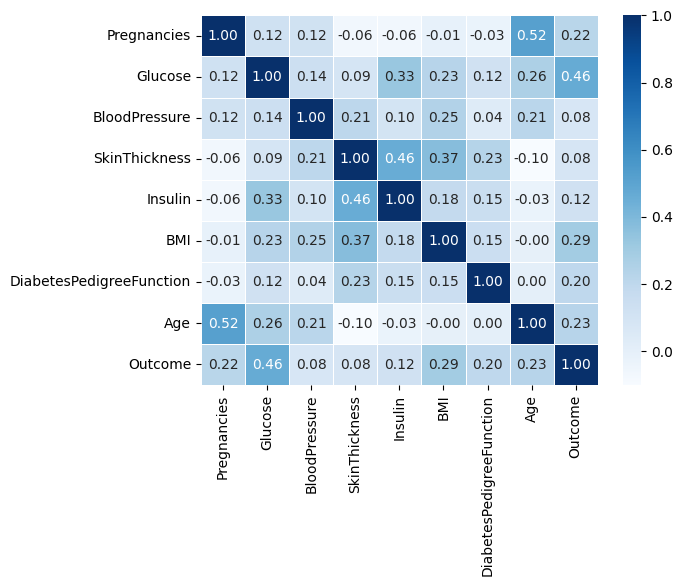

In [254]:
# visualizing correlation between variables using heatmap
sns.heatmap(data_d.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.show()

In [255]:
# Display count of each numerical variable grouped by the target variable 'Outcome'
for col in data_d:
  print(data_d.groupby(['Outcome', col]).size().head(100))

Outcome  Pregnancies
0        0              37
         1              61
         2              43
         3              28
         4              21
         5              19
         6              20
         7              11
         8              10
         9               6
         10              5
         11              3
         12              3
         13              3
1        0              38
         1              29
         2              19
         3              27
         4              23
         5              21
         6              16
         7              25
         8              22
         9              18
         10             10
         11              7
         12              4
         13              5
         14              2
         15              1
         17              1
dtype: int64
Outcome  Glucose
0        0          2
         56         1
         57         1
         61         1
         67         1
  

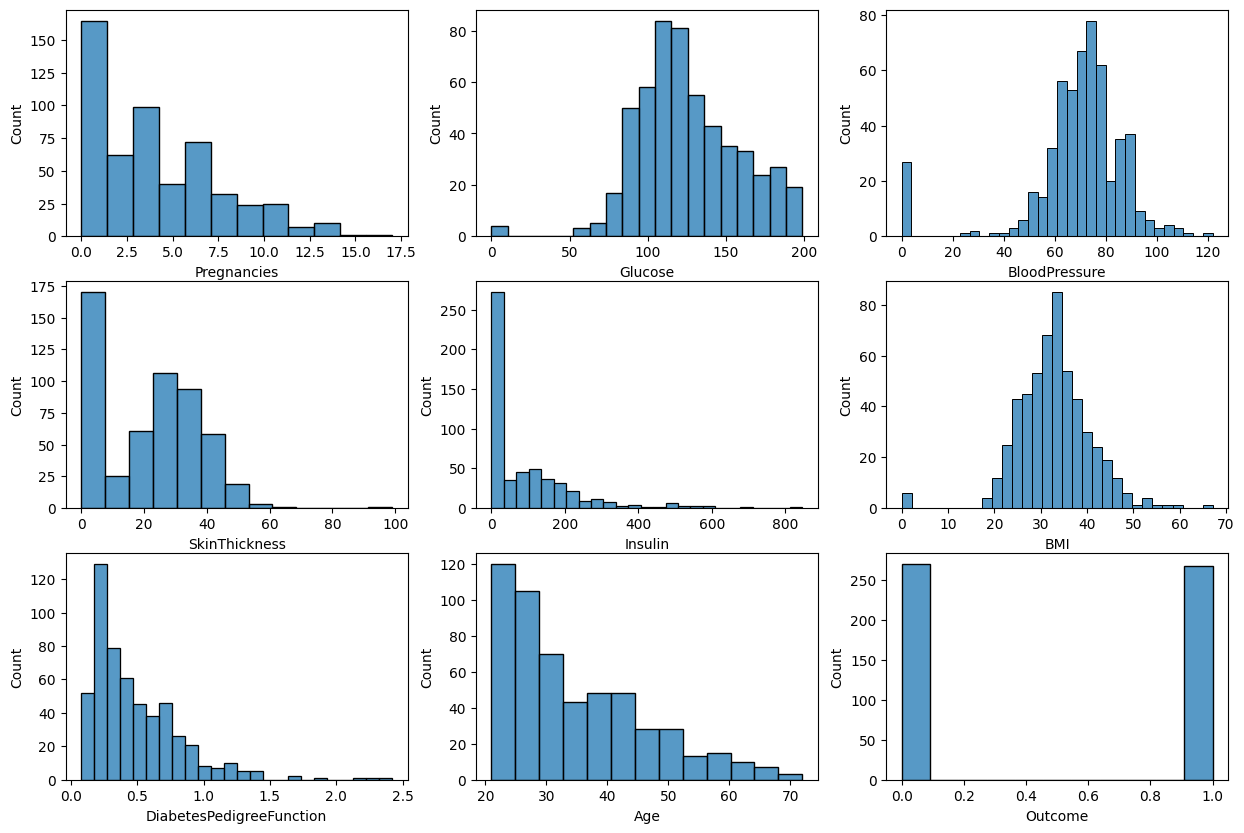

In [256]:
#visualizing the variables
plt.figure(figsize=(15, 10), facecolor='white')
plot=1
for col in data_d:
  ax = plt.subplot(3, 3,plot)
  sns.histplot(x=col, data=data_d)
  plt.xlabel(col)
  plot +=1
plt.show()

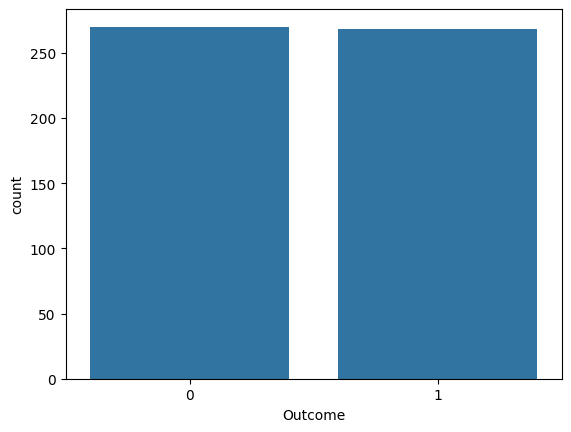

In [257]:
sns.countplot(x='Outcome', data=data_d)
plt.show()

In [258]:
data_d['Insulin'].isnull().sum()

0

In [259]:
# dectecting outliers
list_of_col = ['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
for col in list_of_col:

  upper_limit = data_d[col].mean() + 3*data_d[col].std()
  lower_limit = data_d[col].mean() -3*data_d[col].std()




  print(f'column: {col}')
  print(f'upper limit: {upper_limit}')
  print(f'lower limit: {lower_limit}')
  print('-'*40)

  new_data = new_data.loc[(new_data[col] <= upper_limit) & (new_data[col] >= lower_limit)]

  outlier_after = new_data.loc[(new_data[col] > upper_limit) | (new_data[col] < lower_limit)]

  if len(outlier_after) == 0:
    print(f'no more outliers found in {col} Moving to next columns.')





column: Pregnancies
upper limit: 14.567557838528279
lower limit: -6.377966760461364
----------------------------------------
no more outliers found in Pregnancies Moving to next columns.
column: Glucose
upper limit: 224.1038950835188
lower limit: 27.9593019425035
----------------------------------------
no more outliers found in Glucose Moving to next columns.
column: BloodPressure
upper limit: 129.6254708646
lower limit: 8.835495678150927
----------------------------------------
no more outliers found in BloodPressure Moving to next columns.
column: SkinThickness
upper limit: 70.31019723203258
lower limit: -28.793468607497253
----------------------------------------
no more outliers found in SkinThickness Moving to next columns.
column: Insulin
upper limit: 451.639811982323
lower limit: -279.9409272239587
----------------------------------------
no more outliers found in Insulin Moving to next columns.
column: BMI
upper limit: 56.25466771079999
lower limit: 9.411875040129377
---------

<Axes: ylabel='Pregnancies'>

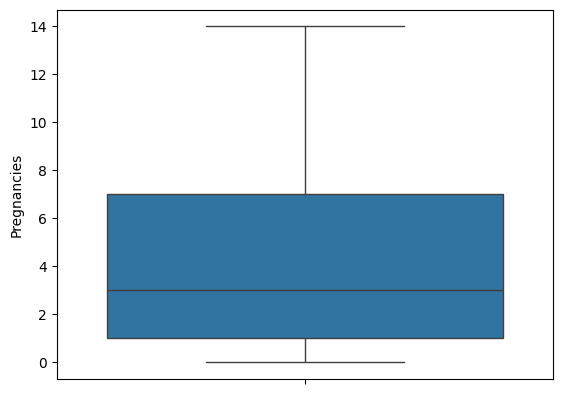

In [260]:
sns.boxplot(new_data['Pregnancies'])

<Axes: ylabel='Insulin'>

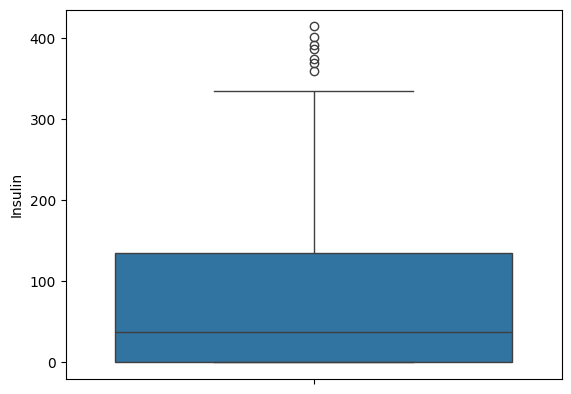

In [261]:
sns.boxplot(new_data['Insulin'])

In [262]:
# find the limit
upper_limit5 = new_data['Insulin'].mean() + 3*new_data['Insulin'].std()
lower_limit5 = new_data['Insulin'].mean() - 3*new_data['Insulin'].std()
print('upper limit:',upper_limit5)
print('lower limit:', lower_limit5)

upper limit: 361.41051643293537
lower limit: -207.21509023750917


In [263]:
new_data.loc[(new_data['Insulin'] > upper_limit5) | (new_data['Insulin'] < lower_limit5)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
710,3,158,64,13,387,31.2,0.295,24,0
392,1,131,64,14,415,23.7,0.389,21,0
258,1,193,50,16,375,25.9,0.655,24,0
248,9,124,70,33,402,35.4,0.282,34,0
231,6,134,80,37,370,46.2,0.238,46,1
715,7,187,50,33,392,33.9,0.826,34,1


In [264]:
# triming the outlier inn Insulin
new_data1 = new_data.loc[(new_data['Insulin'] <= upper_limit5) & (new_data['Insulin'] >= lower_limit5)]

In [265]:
new_data = new_data1

<Axes: ylabel='Insulin'>

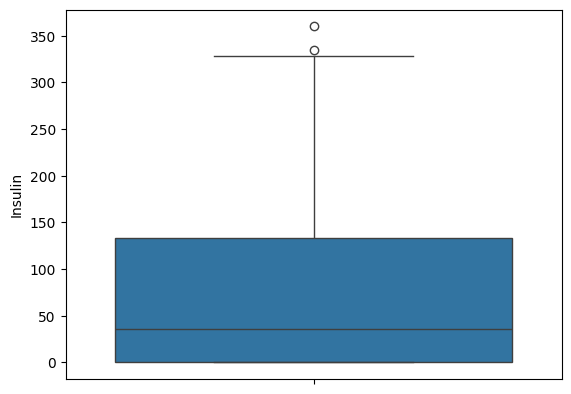

In [266]:
sns.boxplot(new_data['Insulin'])

<Axes: ylabel='DiabetesPedigreeFunction'>

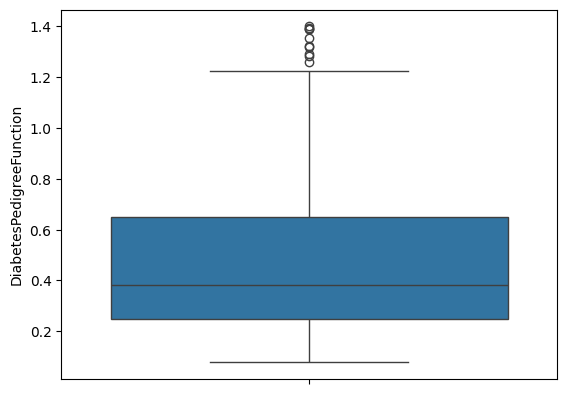

In [267]:
sns.boxplot(new_data['DiabetesPedigreeFunction'])

In [268]:
upper_limit6 = new_data['DiabetesPedigreeFunction'].mean() + 3*new_data['DiabetesPedigreeFunction'].std()
lower_limit6 = new_data['DiabetesPedigreeFunction'].mean() - 3*new_data['DiabetesPedigreeFunction'].std()
print('upper limit:',upper_limit6)
print('lower limit:',lower_limit6)

upper limit: 1.3423330778095481
lower limit: -0.4031246567569168


In [269]:
new_data.loc[(new_data['DiabetesPedigreeFunction'] > upper_limit6) | (new_data['DiabetesPedigreeFunction'] < lower_limit6)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
147,2,106,64,35,119,30.5,1.400,34,0
39,4,111,72,47,207,37.1,1.390,56,1
259,11,155,76,28,150,33.3,1.353,51,1
308,0,128,68,19,180,30.5,1.391,25,1
661,1,199,76,43,0,42.9,1.394,22,1


In [270]:
# triming the outlier in pedigree
new_data2 = new_data[(new_data['DiabetesPedigreeFunction'] < upper_limit6) & (new_data['DiabetesPedigreeFunction'] > lower_limit6)]

In [271]:
new_data = new_data2

<Axes: ylabel='DiabetesPedigreeFunction'>

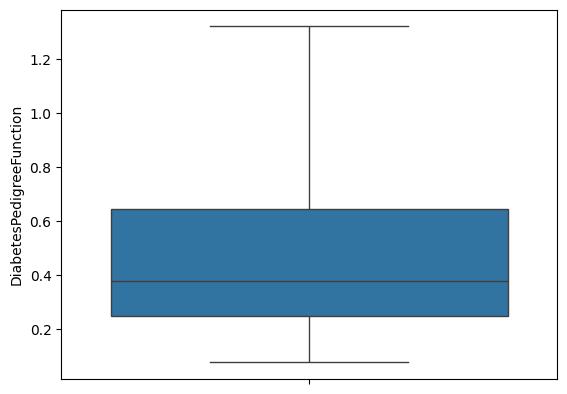

In [272]:
sns.boxplot(new_data['DiabetesPedigreeFunction'], whis=2)

<Axes: ylabel='BloodPressure'>

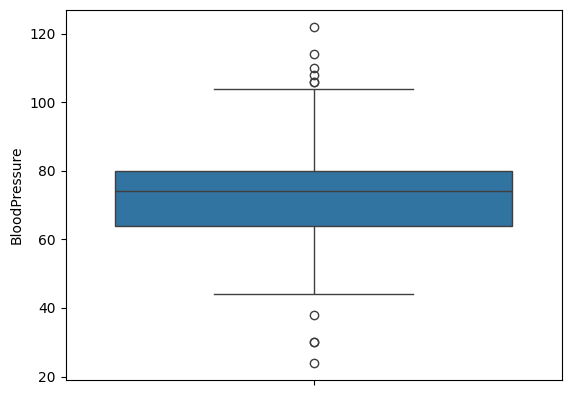

In [273]:
sns.boxplot(new_data['BloodPressure'])

In [274]:
# find the limit for 'Bloodpressure'
upper_limit7 = new_data['BloodPressure'].mean() + 3*new_data['BloodPressure'].std()
lower_limit7 = new_data['BloodPressure'].mean() - 3*new_data['BloodPressure'].std()
print('upper limit:',upper_limit7)
print('lower limit:',lower_limit7)

upper limit: 110.4291497121502
lower limit: 35.46021198997746


In [275]:
new_data.loc[(new_data['BloodPressure'] > upper_limit6) | (new_data['BloodPressure'] < lower_limit6)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
104,2,85,65,0,0,39.6,0.930,27,0
751,1,121,78,39,74,39.0,0.261,28,0
487,0,173,78,32,265,46.5,1.159,58,0
524,3,125,58,0,0,31.6,0.151,24,0
744,13,153,88,37,140,40.6,1.174,39,0
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [276]:
new_data3 = new_data[(new_data['BloodPressure'] < upper_limit7) & (new_data['BloodPressure'] > lower_limit7)]

In [277]:
new_data = new_data3

In [278]:
new_data.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

# **Model Training**

In [279]:
# split the data
X = new_data.drop('Outcome', axis =1)
Y = new_data['Outcome']

In [280]:
# standarad he data
scaler_2 = StandardScaler()
scaler_2.fit(X)

StandardScaler()

In [281]:
scaler_data = scaler_2.transform(X)

In [282]:
X = scaler_data

In [283]:
# train test split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.1, stratify=Y, random_state=2)

In [284]:
len(X_train)

418

In [285]:
len(X_test)

47

In [286]:
# loading the svc model
model_sv = SVC()
model_sv.fit(X_train, Y_train)

SVC()

In [287]:
X_train_pred = model_sv.predict(X_train)
X_train_accu = accuracy_score(X_train_pred, Y_train)
print('accuracy on train data :',X_train_accu)

accuracy on train data : 0.8038277511961722


In [288]:
X_test_pred = model_sv.predict(X_test)
X_test_accu = accuracy_score(X_test_pred, Y_test)
print('accuracy on test data :',X_test_accu)

accuracy on test data : 0.7021276595744681


In [289]:
# classification report
print('Classification Report : ')
print('Accuracy on Test data :',X_test_accu)
print(classification_report(Y_test, X_test_pred))

Classification Report : 
Accuracy on Test data : 0.7021276595744681
              precision    recall  f1-score   support

           0       0.69      0.80      0.74        25
           1       0.72      0.59      0.65        22

    accuracy                           0.70        47
   macro avg       0.71      0.70      0.70        47
weighted avg       0.70      0.70      0.70        47



In [290]:
# implementing confusion matrix
print(confusion_matrix(X_test_pred, Y_test))

[[20  9]
 [ 5 13]]


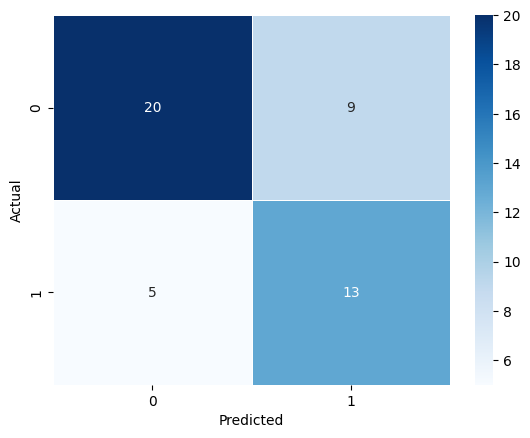

In [291]:
sns.heatmap(confusion_matrix(X_test_pred, Y_test), annot=True, cmap='Blues',  linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()